<a href="https://colab.research.google.com/github/InutilemMachina/DataSciRepo/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
## Classification

### Import data

In [147]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris(as_frame = True)
iris
df = pd.DataFrame(iris.data, columns = iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


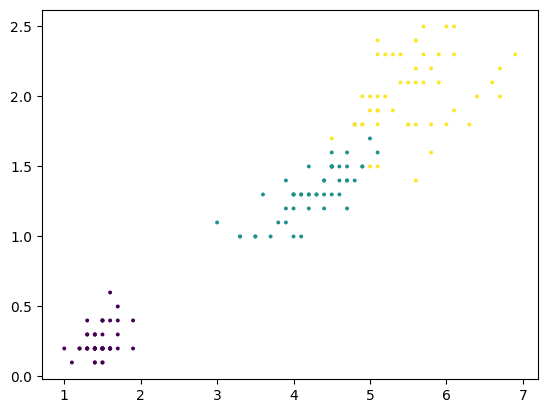

In [148]:
# define the 'X' features and the 'y' target
import matplotlib.pyplot as plt

X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target
X, y
plt.scatter(X[:,0], X[:,1], 3.33, y)

### Fit a tree


In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_clf.fit(X,y)

# problematic in google colab
export_graphviz(tree_clf)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[1] <= 0.8\\ngini = 0.667\\nsamples = 150\\nvalue = [50, 50, 50]"] ;\n1 [label="gini = 0.0\\nsamples = 50\\nvalue = [50, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[1] <= 1.75\\ngini = 0.5\\nsamples = 100\\nvalue = [0, 50, 50]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="gini = 0.168\\nsamples = 54\\nvalue = [0, 49, 5]"] ;\n2 -> 3 ;\n4 [label="gini = 0.043\\nsamples = 46\\nvalue = [0, 1, 45]"] ;\n2 -> 4 ;\n}'

In [150]:
print(export_text(tree_clf,
                  feature_names=["petal length (cm)", "petal width (cm)"]))
# class_names=iris.target_names is not acceptable :(

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [151]:
# to display it in google colab
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(tree_clf,
                           out_file=None,
                           feature_names=["petal length (cm)", "petal width (cm)"],
                           class_names=iris.target_names,
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

In [152]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, X, y, cv=5).round(2)  # accuracy

array([0.93, 0.97, 0.9 , 0.87, 1.  ])

### Visualize results in 2D

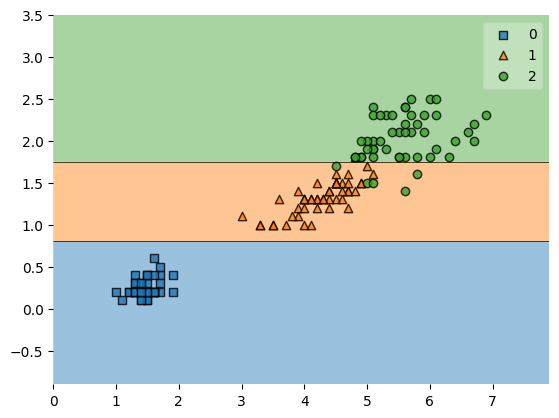

In [153]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(np.array(X), np.array(y), clf=tree_clf)
plt.show()

In [154]:
# if a new record is found, we may be interested in class probabilities
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

### Regularization
Increase the `min_` or reduce the `max_` params to regularize the model.

- `max_features`: Maximum number of features that are evaluated for splitting at each node
- `max_leaf_nodes`: Maximum number of leaf nodes
- `min_samples_split`: Minimum number of samples a node must have before it can be split
- `min_samples_leaf`: Minimum number of samples a leaf node must have to be created
- `min_weight_fraction_leaf`: Same as min_samples_leaf but expressed as a fraction of the total number of
weighted instances



<Axes: >

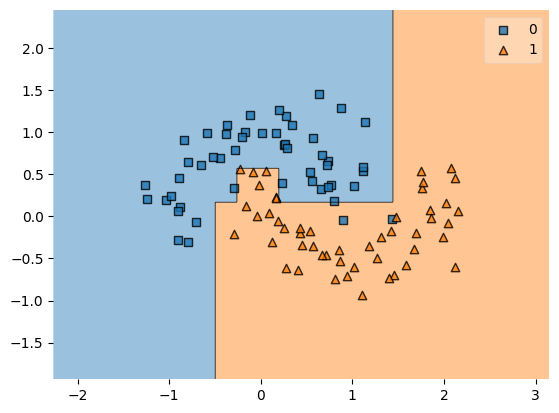

In [155]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=0)

tree_clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=0)
tree_clf.fit(X, y)
plot_decision_regions(X,y, clf=tree_clf)

final notes: be advised, trees are sensitive to data rotation

## Regression

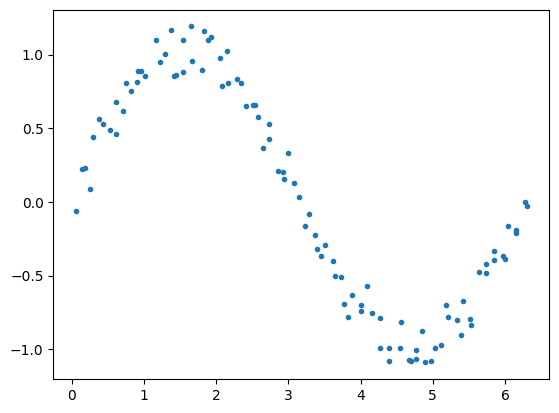

In [156]:
import numpy as np

# np.random.seed(0)
# X = np.linspace(-10, 10, 250) + 0.5*np.random.randn(250)
# y = 0.3*X**2 + np.random.randn(250)
# plt.plot(X,y,'.')

np.random.seed(0)
X = np.linspace(0, 2*np.pi, 100) + 0.1*np.random.rand(100)
y = np.sin(X) + 0.1*np.random.randn(100)
plt.plot(X,y,'.')

In [157]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=0)
tree_reg.fit(X.reshape(-1, 1),y.reshape(-1, 1))

DecisionTreeRegressor(max_depth=2, random_state=0)

In [158]:
# # Compute the RMSE using cross-validation
# scores = np.sqrt(-cross_val_score(tree_reg, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=5))
# scores

In [159]:
print(export_text(tree_reg))

|--- feature_0 <= 3.19
|   |--- feature_0 <= 2.61
|   |   |--- value: [0.77]
|   |--- feature_0 >  2.61
|   |   |--- value: [0.26]
|--- feature_0 >  3.19
|   |--- feature_0 <= 5.59
|   |   |--- value: [-0.74]
|   |--- feature_0 >  5.59
|   |   |--- value: [-0.29]



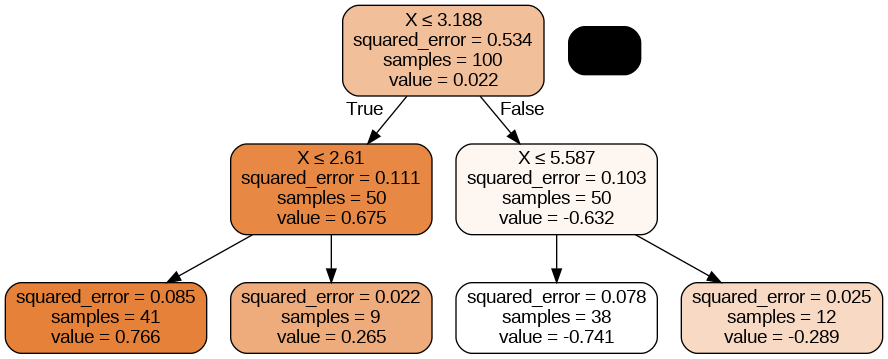

In [160]:
# to display it in google colab
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(tree_reg,
                           out_file=None,
                           feature_names=['X'],
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

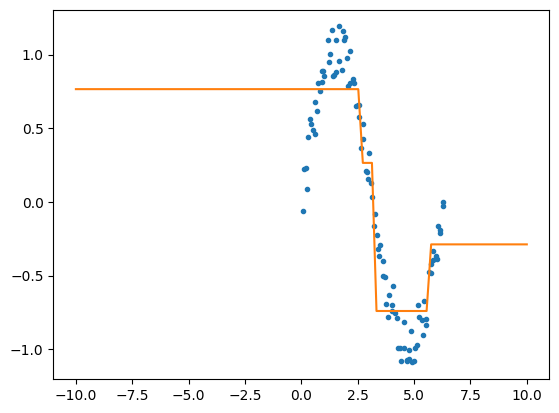

In [161]:
x_new = np.linspace(-10, 10, 100).reshape(-1, 1)
y_pred = tree_reg.predict(x_new)

plt.plot(X,y,'.')
plt.plot(x_new,y_pred)

In [162]:
# Compute the RMSE using cross-validation
scores = np.sqrt(-cross_val_score(tree_reg, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=5))
scores

array([0.472302  , 0.37408502, 0.58864379, 0.45444236, 0.49302757])

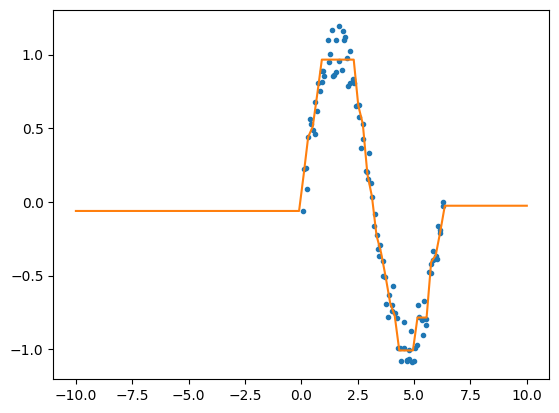

In [163]:
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=0)
tree_reg.fit(X.reshape(-1, 1),y.reshape(-1, 1))
x_new = np.linspace(-10, 10, 100).reshape(-1, 1)
y_pred = tree_reg.predict(x_new)
plt.plot(X,y,'.')
plt.plot(x_new,y_pred)

In [164]:
# Compute the RMSE using cross-validation
scores = np.sqrt(-cross_val_score(tree_reg, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=5))
scores

array([0.63265705, 0.28649909, 0.39647686, 0.19764144, 0.589262  ])